# MNIST

The structure of this notebook will be as follows:

1. Import the MNIST data set and explore it
2. Manually build a neural network for classifying the digits
3. Use Tensorflow/Keras to implement a neural network
4. Compare manual implementation with Tensorflow/Keras


## 1. Import the MNIST data set and explore it

In this section, we will load the data and get acquainted with it. In the end, we want to plot some of the handwritten digits from the data, in order to get a better idea of the data.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from scipy.special import expit
import sys
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train = df_train.drop(labels=["label"], axis=1)
y_train = df_train["label"]
X_test = df_test

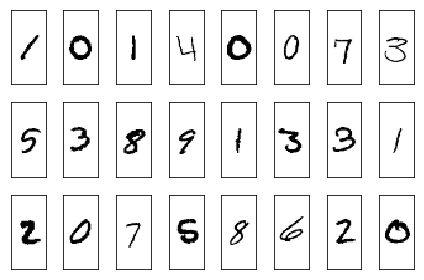

In [4]:
# plot the first couple of handwritten digits

nrows = 3
ncols = 8
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)
ax = ax.flatten()


for i in range(nrows*ncols):
    img = np.array(X_train.loc[[i]]).reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## 2. Manually build a neural network for classifying the digits

In this section we are going to manually implement a class, with which one can construct a multilayer neural network. (comment on hidden layers, optimization procedure/backpropagation, classifier function, etc. - in the end, maybe save this in a separate file, e.g. neuralnet.py)

In [5]:
class PerceptronOvA(object):
    """
    Parameters
    --------------------
    eta - learning rate
    n_epochs - passes over the training set

    Attributes
    --------------------
    w_ - weights after fitting
    b_ - bias after fitting
    errors_ - number of misclassifications in every epoch
    """

    def __init__(self, eta=0.01, n_epochs=10):
        self.eta = eta
        self.n_epochs = n_epochs

    def fit(self, X, y):
        """
        Parameters
        --------------------
        X - data
        y - labels

        Returns
        --------------------
        self
        """

        self.w_ = np.zeros(shape=(X.shape[1], len(y.unique())))
        self.b_ = np.zeros(len(y.unique()))
        lb = LabelBinarizer(neg_label=-1, pos_label=1)
        self.yi_ = lb.fit_transform(y)

        for _ in range(self.n_epochs):
            for xi, target in zip(X.as_matrix(), self.yi_):
                update = self.eta*(target - self.predict(xi))
                self.w_ += np.outer(xi,update)
                self.b_ += update
        return self

    def net_input(self, X):
        """ Calculate net input function """
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    def gen_csv(self, X):
        """ Generate a csv file with the ImageId and the Label """
        prediction = np.argmax(self.predict(X), axis=1)
        df_sub = pd.DataFrame({"ImageId": X.index.values+1, "Label": prediction})
        return df_sub

In [6]:
ovaPerc = PerceptronOvA(eta=0.02, n_epochs=20)

In [7]:
ovaPerc.fit(X_train,y_train)

In [8]:
ovaPerc.gen_csv(X_test).to_csv("testSub.csv", index=False)